In [3]:
import cv2
import time
from matplotlib import pyplot as plt

## Yunet

In [17]:
size = (640, 480)
face_detector = cv2.FaceDetectorYN_create(
    "../models/face_detection_yunet_2023mar.onnx", "", size
)
face_detector.setInputSize(size)
image = cv2.imread("../data/test/scenario_8/61.jpg")

start = time.time()
faces = face_detector.detect(image)
end = time.time()
print(f"run in {(end - start)*1000} ms")

if faces[1] is not None:
    for face in faces[1]:
        box = face[:4].astype(int)
        cv2.rectangle(
            image, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2
        )
else:
    print("No faces detected.")

cv2.imshow("Face Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

run in 13.518333435058594 ms
No faces detected.


Whery poor performance on my images, no point to continue

run in 4347.450494766235 ms


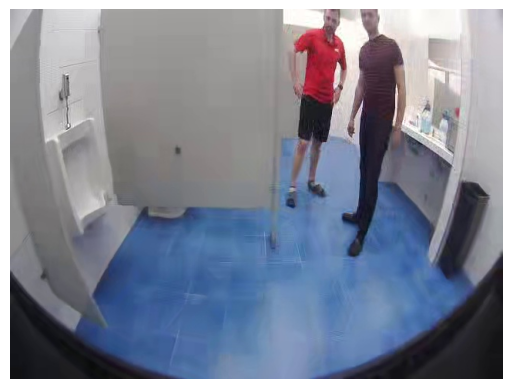

In [31]:
import dlib
detector = dlib.cnn_face_detection_model_v1("../models/mmod_human_face_detector.dat")
image = cv2.imread('../data/test/scenario_1/90.jpg')

start = time.time()
faces = detector(image)
end = time.time()
print(f"run in {(end - start)*1000} ms")

for face in faces:    
    x1 = face.rect.left()
    y1 = face.rect.bottom()
    x2 = face.rect.right()
    y2 = face.rect.top()
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 5)
    
    conf = face.confidence
    text = f"{conf*100:.2f}%"
    cv2.putText(image, text, (x1, y1-20), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 0, 0), thickness=4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Poor performance on my images, and very high inference time

run in 20.052433013916016 ms


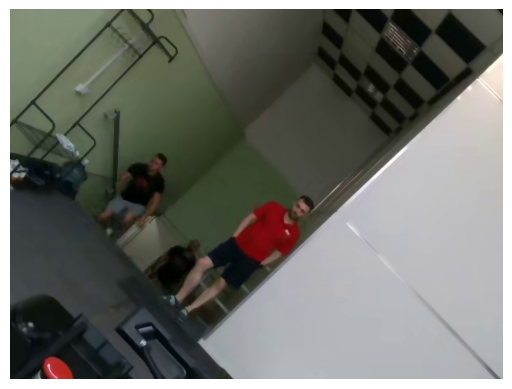

In [32]:
image = cv2.imread('../data/test/scenario_3/822.jpg')
detector = dlib.get_frontal_face_detector()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

start = time.time()
faces = detector(gray)
end = time.time()
print(f"run in {(end - start)*1000} ms")

for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Poor performance on my images. Let's move on.

## RetinaFace

In [1]:
from retinaface import RetinaFace

2024-07-28 14:49:27.117400: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 14:49:27.120011: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 14:49:27.127623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 14:49:27.142655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 14:49:27.142683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 14:49:27.151996: I tensorflow/core/platform/cpu_feature_guard.cc:

In [5]:
def named_frame(frame: cv2.typing.MatLike, number: int) -> cv2.typing.MatLike:
    named_frame = frame.copy()
    cv2.putText(
        named_frame,
        str(number),
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 255, 255),
        2,
        cv2.LINE_AA,
    )
    return named_frame

In [1]:
index = 20
while index < 500:
    path = f"../data/test/scenario_7/{index}.jpg"
    image = cv2.imread(path)

    start = time.time()
    faces = RetinaFace.detect_faces(path, threshold = 0.4, allow_upscaling=False)
    end = time.time()
    print(f"run in {(end - start)*1000} ms")

    for key in faces.keys():
        face = faces[key]
        facial_area = face["facial_area"]
        cv2.rectangle(
            image,
            (facial_area[2], facial_area[3]),
            (facial_area[0], facial_area[1]),
            (0, 255, 0),
            2,
        )
    cv2.imshow("Frame", named_frame(image, index))
    key = cv2.waitKey(0) & 0xFF
    if key == ord("q"):
        break
    elif key == 81:  # left arrow
        index -= 1
    elif key == 83:  # right arrow
        index += 1

cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [11]:
index = 1
while index < 2000:
    path = f"../data/noface/realsense/{index}.jpg"
    image = cv2.imread(path)

    start = time.time()
    faces = RetinaFace.detect_faces(path, threshold=0.4, allow_upscaling=False)
    end = time.time()
    print(f"run in {(end - start)*1000} ms")

    for key in faces.keys():
        face = faces[key]
        facial_area = face["facial_area"]
        cv2.rectangle(
            image,
            (facial_area[2], facial_area[3]),
            (facial_area[0], facial_area[1]),
            (0, 255, 0),
            2,
        )
    cv2.imshow("Frame", named_frame(image, index))
    key = cv2.waitKey(0) & 0xFF
    if key == ord("q"):
        break
    elif key == 81:  # left arrow
        index -= 1
    elif key == 83:  # right arrow
        index += 1

cv2.destroyAllWindows()

run in 301.56612396240234 ms
run in 276.49736404418945 ms
run in 290.22860527038574 ms
run in 292.4799919128418 ms
run in 280.8809280395508 ms
run in 317.02470779418945 ms
run in 309.2062473297119 ms
run in 305.10878562927246 ms
run in 340.15488624572754 ms
run in 328.474760055542 ms
run in 399.8987674713135 ms
run in 322.7958679199219 ms
run in 252.78949737548828 ms
run in 275.9220600128174 ms
run in 320.25814056396484 ms
run in 287.78886795043945 ms
run in 293.00999641418457 ms
run in 297.4505424499512 ms
run in 286.9110107421875 ms
run in 321.66409492492676 ms
run in 330.92522621154785 ms
run in 312.4089241027832 ms
run in 336.470365524292 ms
run in 292.74892807006836 ms
run in 316.30396842956543 ms
run in 307.5988292694092 ms
run in 300.11820793151855 ms
run in 330.0154209136963 ms
run in 333.8813781738281 ms
run in 296.4937686920166 ms
run in 392.7640914916992 ms
run in 353.1770706176758 ms
run in 350.02613067626953 ms
run in 375.2100467681885 ms
run in 395.95556259155273 ms
run i

## DSFD
https://github.com/hukkelas/DSFD-Pytorch-Inference

In [1]:
import cv2
import face_detection
print(face_detection.available_detectors)
detector = face_detection.build_detector(
  "DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)

['DSFDDetector', 'RetinaNetResNet50', 'RetinaNetMobileNetV1']


/home/michael/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/michael/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
image = cv2.imread("../data/test/scenario_3/822.jpg")[:, :, ::-1]
image = cv2.imread("/home/michael/Pictures/Webcam/2024-07-28_17-58.png")[:, :, ::-1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

start = time.time()
detections = detector.detect(image)
end = time.time()
print(f"run in {(end - start)*1000} ms")

for detection in detections:
    print(detection)
    print(
        (int(detection[2]) - int(detection[0]))
        * (int(detection[3]) - int(detection[1]))
    )
    cv2.rectangle(
        image,
        (int(detection[0]), int(detection[1])),
        (int(detection[2]), int(detection[3])),
        (0, 255, 0),
        2,
    )

cv2.imshow("Frame", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

run in 139.7240161895752 ms
[310.27533   160.42073   405.41666   273.38135     0.9997402]
10735


In [49]:
detector = face_detection.build_detector(
  "DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)

index = 745
while index < 960:
    path = f"../data/test/scenario_3/{index}.jpg"
    image = cv2.imread(path)

    start = time.time()
    detections = detector.detect(image)
    end = time.time()
    print(f"run in {(end - start)*1000} ms")

    for detection in detections:
        cv2.rectangle(
            image,
            (int(detection[0]), int(detection[1])),
            (int(detection[2]), int(detection[3])),
            (0, 255, 0),
            2,
        )
    cv2.imshow("Frame", named_frame(image, index))
    key = cv2.waitKey(0) & 0xFF
    if key == ord("q"):
        break
    elif key == 81:  # left arrow
        index -= 1
    elif key == 83:  # right arrow
        index += 1

cv2.destroyAllWindows()

run in 78.33242416381836 ms
run in 55.060625076293945 ms
run in 56.887149810791016 ms
run in 55.00507354736328 ms
run in 56.68997764587402 ms
run in 55.94921112060547 ms
run in 55.823564529418945 ms
run in 54.27861213684082 ms
run in 54.231882095336914 ms
run in 57.40094184875488 ms
run in 45.07184028625488 ms
run in 48.37965965270996 ms
run in 66.5283203125 ms
run in 54.44645881652832 ms
run in 62.50572204589844 ms
run in 61.45977973937988 ms
run in 54.36968803405762 ms
run in 57.131290435791016 ms
run in 56.52666091918945 ms
run in 55.43041229248047 ms
run in 54.37469482421875 ms
run in 54.95190620422363 ms
run in 56.45751953125 ms
run in 55.64475059509277 ms
run in 54.69775199890137 ms
run in 53.35569381713867 ms
run in 54.47816848754883 ms
run in 57.094573974609375 ms
run in 57.04760551452637 ms
run in 55.10663986206055 ms
run in 56.058406829833984 ms
run in 55.924177169799805 ms
run in 55.86528778076172 ms
run in 56.15377426147461 ms
run in 55.75108528137207 ms
run in 56.162118911

This is the best model so far